In [2]:
import numpy as np
import cv2
import os
from  Scripts.Utility import Utility2
util = Utility2()

util.Test()

in init
HUH?


### Compare zoom levels of same image

Using the same position, compare all three zoom-levels

In [3]:
root_dir = os.path.abspath("../")
path= '/Scripts/TestImages' #skal have '/' før Scripts

images= util.loadImages(path)

gray_images = []
tresh_images = []
for x in range(len(images)):
    gray_images.append(cv2.cvtColor(images[x], cv2.COLOR_BGR2GRAY))

tresh_images = util.thresholdImages(gray_images, invert=False)

#fluorescent is 0,2,4
pairs = []

_merge = cv2.addWeighted(gray_images[1], 0.5, tresh_images[0],0.5, 0.0)
pairs.append(_merge)

In [11]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(tresh_images[0],cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
#cv2.imshow("sure_bg0",cv2.resize(tresh_images[0],(500,500)))
#cv2.imshow("sure_bg",cv2.resize(sure_bg,(500,500)))

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
#cv2.imshow("unknown",cv2.resize(unknown,(500,500)))
# Marker labelling
num_markers, markers = cv2.connectedComponents(tresh_images[0])
#cv2.imshow("markers",markers)
# Add one to all labels so that sure background is not 0, but 1
#markers = markers+1
## Now, mark the region of unknown with zero
#markers[unknown==255] = 0
#
test_img = images[1]
#cv2.imshow("burde være sort/hvid", cv2.resize(images[1],(500,500)))

#
#markers = cv2.watershed(test_img,markers)

# Markers: 0 is Bacground
test_img[markers == 1] = [255,0,0] #BLUE  1: top right blob
test_img[markers == 10] = [0,255,0] # GREEN  10 big blob
test_img[markers == 6] = [0,0,255] # RED 6: left most blob

#cv2.imshow("TestLabeling0", cv2.resize(test_img,(500,500)))
#cv2.imwrite("LabeledImage.jpg", test_img)


alpha = 0.11
beta = 1-alpha
test2 = cv2.addWeighted(test_img,alpha,images[1],beta,0.0)
cv2.imshow("Test", cv2.resize(test_img,(500,500)))
cv2.imshow("Original", cv2.resize(images[1],(500,500)))
#cv2.imshow("TestMerge", cv2.resize(test2,(500,500)))
#cv2.imwrite("LabeledMerge.jpg", test2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
im2, contours, hierarchy = cv2.findContours(test_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-2b5g8ysb\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


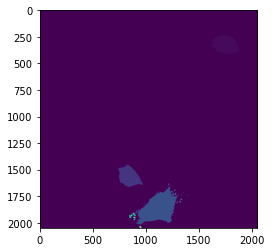

In [5]:
import matplotlib.pyplot as plt
plt.imshow(markers)
plt.show()
